In [1]:
import os
import math

import pandas as pd
import numpy as np

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from Jetson.autopilot.record.AutopilotGUI import AutopilotGUI

In [2]:
datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(datasets_path)
dataset_paths = [[datasets_path + sub_dir + "/" + sub_dir + ".csv", datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:12 2021/Sun Jan 10 11:31:12 

In [3]:
from RoadDataset import RoadDataset

In [4]:
dataset_index = 7
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
dataset = RoadDataset(dataset_paths[dataset_index][0], dataset_paths[dataset_index][1], column_names, mode='train')

Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:36:21 2021/Sun Jan 10 11:36:21 2021.csv
Loaded dataset with 84359 samples


In [5]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,84359.0,-0.718814,54.300702,-492.48,-3.760,-0.190,2.19,498.740
speed,84359.0,85.789855,45.211506,0.62,48.236,81.964,120.90,205.158
blink_l,84359.0,0.039142,0.193934,0.00,0.000,0.000,0.00,1.000
blink_r,84359.0,0.049787,0.217506,0.00,0.000,0.000,0.00,1.000


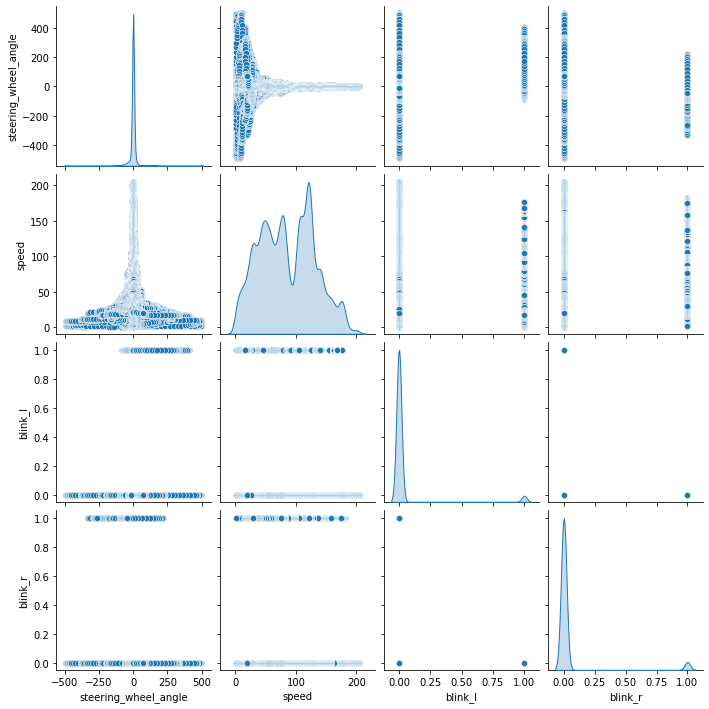

In [6]:
dataset.pairplot()

In [7]:
dataset.clean()

Cleaning dataset. Starting with 84359 samples.
Removing 7469 rows for reason: Low speed (< 25 km/h)
Removing 2542 rows for reason: High SWA (> +45/ < -45 deg)
Removing 2293 rows for reason: Left blinker on
Removing 3107 rows for reason: Right blinker on
68948 samples remaining.


In [8]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,68948.0,-0.858342,8.399433,-44.950,-2.940,-0.13,1.630,44.770
speed,68948.0,93.959242,39.940769,25.017,59.365,92.69,122.543,205.158
blink_l,68948.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
blink_r,68948.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


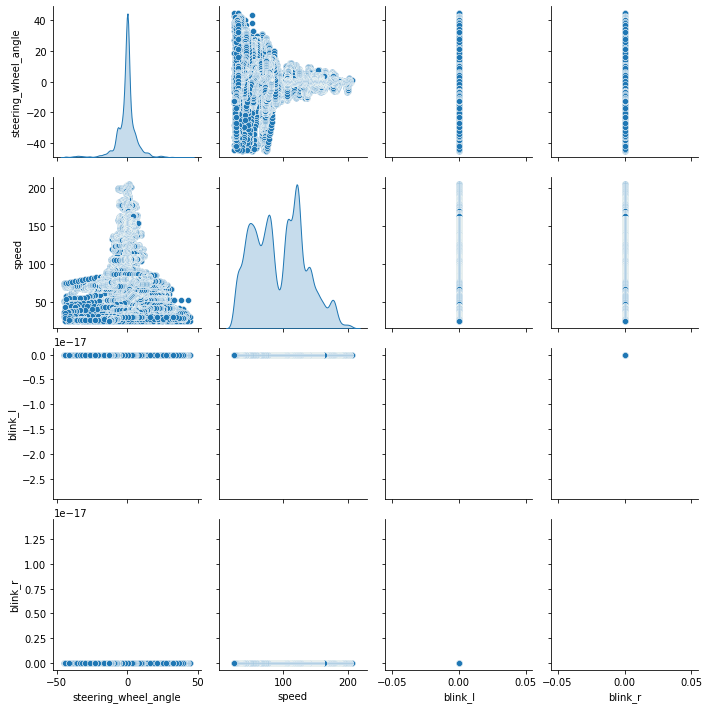

In [9]:
dataset.pairplot()

In [10]:
dataset.balance()

Balancing dataset. Starting with 68948 samples.
[281, 433, 495, 327, 415, 946, 2131, 7603, 23617, 23586, 5455, 1856, 725, 487, 283, 179, 59, 70]
59
1062 samples remaining.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


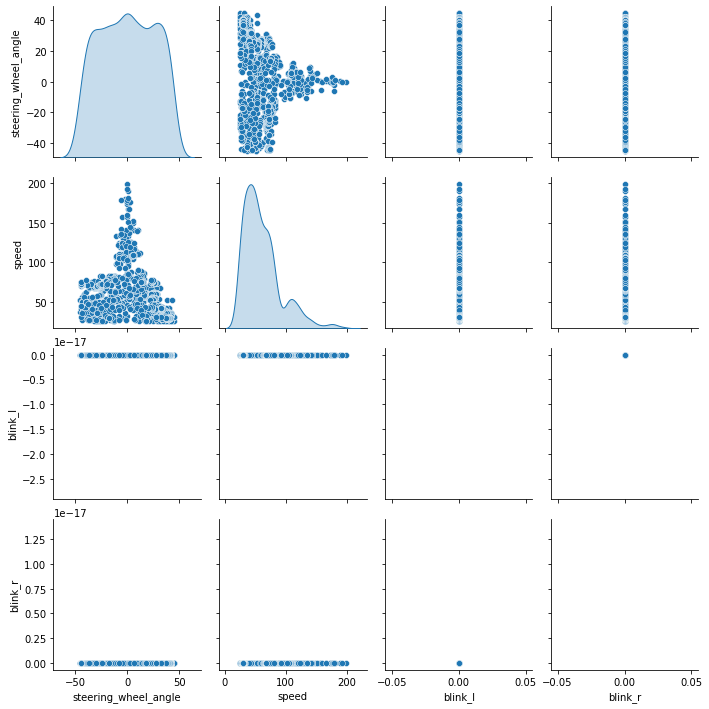

In [11]:
dataset.pairplot()

In [12]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1062.0,-0.051573,25.883625,-44.950,-21.730,-0.0350,23.570,44.770
speed,1062.0,61.040197,30.887925,25.141,39.308,52.9635,74.059,198.927
blink_l,1062.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
blink_r,1062.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000


In [13]:
dataset.normalize()

In [14]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1062.0,-0.000573,0.287596,-0.499444,-0.241444,-0.000389,0.261889,0.497444
speed,1062.0,61.040197,30.887925,25.141000,39.308000,52.963500,74.059000,198.927000
blink_l,1062.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
blink_r,1062.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
gui = AutopilotGUI()
batch_gui = AutopilotGUI()

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array

In [17]:
def show_frame(index):
    
    frame = img_to_array(dataset.get_frame(index)[0])
    gui.set_frame(frame)
    gui.set_show_overlay(True)
    gui.set_engaged(False)
    gui.set_recording(True)
    
    blink_l = dataset.get_indicator_left(index)
    print("blink_l: " + str(blink_l))
    gui.set_indicator_left(blink_l)
    #gui.set_indicator_right(indicator_right)
    #gui.set_cruise_control(cruise_control)
    #gui.set_cruise_control_setpoint(cc_setpoint)
    
    velocity = dataset.get_velocity(index)
    gui.set_velocity(velocity)
    
    timestamp = dataset.get_timestamp(index)
    gui.set_timestring(timestamp)
    
    
    actual_swa = dataset.get_swa(index)*90
    print("actual_swa: " + str(actual_swa))
    gui.set_actual_swa(actual_swa)
    #gui.set_predicted_swa(predicted_swa)
    
    gui.show_jupyter()
    
    
from matplotlib import pyplot as plt
    
def show_crop(index, shift):
    frame = img_to_array(dataset.get_cropped_frame(index, shift)[0])
    plt.imshow(frame/255)
    plt.show()
    
    
def show_batch(batch_index, frame_index):
    batch = dataset.get_batch_features(batch_index)
    frame = batch[frame_index]
    
    labels = dataset.get_batch_labels(batch_index)
    actual_swa = labels[frame_index]*90
    
    batch_gui.set_frame(frame)
    batch_gui.set_show_overlay(True)
    batch_gui.set_engaged(False)
    batch_gui.set_recording(True)
    
    
    #velocity = dataset.get_velocity(index)
    #batch_gui.set_velocity(velocity)
    
    #timestamp = dataset.get_timestamp(index)
    #batch_gui.set_timestring(timestamp)
    
    
    #actual_swa = dataset.get_swa(index)*90
    print("actual_swa: " + str(actual_swa))
    batch_gui.set_actual_swa(actual_swa)
    #gui.set_predicted_swa(predicted_swa)
    
    batch_gui.show_jupyter()

In [18]:
import ipywidgets as widgets
frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)

In [19]:
from ipywidgets import interact

interact(show_frame, index=frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=1055), Output()), _…

In [20]:
batch_slider = widgets.IntSlider(min=0, max=len(dataset)-1, continuous_update=False)
batch_frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()-1, continuous_update=False)

interact(show_batch, batch_index=batch_slider, frame_index=batch_frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='batch_index', max=65), IntSlide…

In [21]:
crop_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)
shift_slider = widgets.IntSlider(min=-100, max=100, continuous_update=False)

In [22]:
interact(show_crop, index=crop_slider, shift = shift_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=1055), IntSlider(va…

In [23]:
train_stats = dataset.get_csv().describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,1062.0,-0.000573,0.287596,-0.499444,-0.241444,-0.000389,0.261889,0.497444
speed,1062.0,61.040197,30.887925,25.141000,39.308000,52.963500,74.059000,198.927000
blink_l,1062.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
blink_r,1062.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
dataset.get_batch_labels(0)

array([-0.13366667,  0.15255556,  0.00933333,  0.01144444, -0.33511111,
       -0.42066667,  0.21477778, -0.26844444, -0.40777778, -0.15288889,
       -0.19955556,  0.04544444,  0.35411111, -0.19855556, -0.083     ,
        0.42833333])

In [25]:
feature_batch = dataset.get_batch_features(0)
feature_batch

array([[[[2.0000000e+00, 2.0000000e+01, 3.0000000e+01],
         [2.0000000e+00, 1.9000000e+01, 2.9000000e+01],
         [4.0000000e+00, 1.6000000e+01, 2.8000000e+01],
         ...,
         [1.1900000e+02, 1.0300000e+02, 4.1000000e+01],
         [1.1700000e+02, 1.0400000e+02, 3.6000000e+01],
         [1.1600000e+02, 1.0300000e+02, 3.3000000e+01]],

        [[3.4187500e+01, 4.2906250e+01, 3.0687500e+01],
         [1.7187500e+00, 1.9000000e+01, 2.8999998e+01],
         [4.1562500e+00, 1.9000000e+01, 2.9718748e+01],
         ...,
         [1.2468751e+02, 1.0612501e+02, 4.3531250e+01],
         [1.1725001e+02, 1.0140624e+02, 3.5250000e+01],
         [1.1787500e+02, 1.0287499e+02, 3.4437504e+01]],

        [[7.1218750e+01, 6.7156250e+01, 3.1906250e+01],
         [6.1250005e+00, 1.9656250e+01, 2.4062502e+01],
         [6.3437500e+00, 1.7937500e+01, 2.5343750e+01],
         ...,
         [1.2746875e+02, 1.0546875e+02, 2.9937500e+01],
         [1.2846877e+02, 1.0740625e+02, 3.4281250e+01],
  

In [26]:
batch_count = len(dataset)
batch_count

66